# Chapter 4: Dimension Reduction

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> Code included in
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.

## Import required packages

In [1]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt


## Table 4.3

In [6]:
bostonHousing_df = pd.read_csv('BostonHousing.csv')
bostonHousing_df = bostonHousing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
bostonHousing_df.head(9)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0


In [3]:
bostonHousing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


Compute mean, standard deviation, min, max, median, length, and missing values of CRIM

In [7]:
print('Mean : ', bostonHousing_df.CRIM.mean())
print('Std. dev : ', bostonHousing_df.CRIM.std())
print('Min : ', bostonHousing_df.CRIM.min())
print('Max : ', bostonHousing_df.CRIM.max())
print('Median : ', bostonHousing_df.CRIM.median())
print('Length : ', len(bostonHousing_df.CRIM))

print('Number of missing values : ', bostonHousing_df.CRIM.isnull().sum())

Mean :  3.613523557312254
Std. dev :  8.60154510533249
Min :  0.00632
Max :  88.9762
Median :  0.25651
Length :  506
Number of missing values :  0


Compute mean, standard dev., min, max, median, length, and missing values for all variables

In [8]:
pd.DataFrame({'mean': bostonHousing_df.mean(),
              'sd': bostonHousing_df.std(),
              'min': bostonHousing_df.min(),
              'max': bostonHousing_df.max(),
              'median': bostonHousing_df.median(),
              'length': len(bostonHousing_df),
              'miss.val': bostonHousing_df.isnull().sum(),
             })

,mean,sd,min,max,median,length,miss.val
CRIM,3.613524,8.601545,0.00632,88.9762,0.25651,506,0
ZN,11.363636,23.322453,0.00000,100.0000,0.00000,506,0
INDUS,11.136779,6.860353,0.46000,27.7400,9.69000,506,0
CHAS,0.069170,0.253994,0.00000,1.0000,0.00000,506,0
NOX,0.554695,0.115878,0.38500,0.8710,0.53800,506,0
RM,6.284634,0.702617,3.56100,8.7800,6.20850,506,0
AGE,68.574901,28.148861,2.90000,100.0000,77.50000,506,0
DIS,3.795043,2.105710,1.12960,12.1265,3.20745,506,0
RAD,9.549407,8.707259,1.00000,24.0000,5.00000,506,0
TAX,408.237154,168.537116,187.00000,711.0000,330.00000,506,0


## Table 4.4

In [9]:
bostonHousing_df.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,0.46,-0.39,-0.15
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,-0.41,0.36,0.37
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,0.60,-0.48,-0.37
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,-0.05,0.18,0.11
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,0.59,-0.43,-0.23
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,-0.61,0.70,0.64
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,0.60,-0.38,-0.19
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,-0.50,0.25,0.12
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,0.49,-0.38,-0.20
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,0.54,-0.47,-0.27


## Table 4.5

In [10]:
bostonHousing_df.CHAS.value_counts()

0    471
1     35
Name: CHAS, dtype: int64

## Table 4.6
Create bins of size 1 for variable using the method `pd.cut`. By default, the method creates a categorical variable, e.g. `(6,7]`. The argument `labels=False` determines integers instead, e.g. `6`.

In [11]:
bostonHousing_df['RM_bin'] = pd.cut(bostonHousing_df.RM, range(0, 10), labels=False)
bostonHousing_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV,RM_bin
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0,6
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0,6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1,7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1,6
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1,7


Compute the average of MEDV by (binned) RM and CHAS. First group the data frame using the `groupby` method, then restrict the analysis to MEDV and determine the mean for each group.

In [12]:
bostonHousing_df.groupby(['RM_bin', 'CHAS'])['MEDV'].mean()

RM_bin  CHAS
3       0       25.300000
4       0       15.407143
5       0       17.200000
        1       22.218182
6       0       21.769170
        1       25.918750
7       0       35.964444
        1       44.066667
8       0       45.700000
        1       35.950000
Name: MEDV, dtype: float64

## Table 4.7

In [13]:
bostonHousing_df = pd.read_csv('BostonHousing.csv')
bostonHousing_df = bostonHousing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
bostonHousing_df['RM_bin'] = pd.cut(bostonHousing_df.RM, range(0, 10), labels=False)

In [14]:
mlt = pd.melt(bostonHousing_df, id_vars=['RM_bin', 'CHAS'], 
              value_vars=['MEDV'])
mlt.head()

,RM_bin,CHAS,variable,value
0,6,0,MEDV,24.0
1,6,0,MEDV,21.6
2,7,0,MEDV,34.7
3,6,0,MEDV,33.4
4,7,0,MEDV,36.2


In [15]:
pd.pivot_table(mlt, values='value', index=['RM_bin'], columns=['CHAS'],
               aggfunc=np.mean, margins=True)

CHAS,0,1,All
RM_bin,,,
3,25.300000,NaN,25.300000
4,15.407143,NaN,15.407143
5,17.200000,22.218182,17.551592
6,21.769170,25.918750,22.015985
7,35.964444,44.066667,36.917647
8,45.700000,35.950000,44.200000
All,22.093843,28.440000,22.532806


In [16]:
pd.pivot_table(bostonHousing_df, values='MEDV', index=['RM_bin'], columns=['CHAS'], aggfunc=np.mean, margins=True)

CHAS,0,1,All
RM_bin,,,
3,25.300000,NaN,25.300000
4,15.407143,NaN,15.407143
5,17.200000,22.218182,17.551592
6,21.769170,25.918750,22.015985
7,35.964444,44.066667,36.917647
8,45.700000,35.950000,44.200000
All,22.093843,28.440000,22.532806


## Figure 4.1
Use the method `pd.crosstab` for cross tabulation of two variables. In a second step, we convert the counts into percentages along the columns.

In [17]:
tbl = pd.crosstab(bostonHousing_df.CAT_MEDV, bostonHousing_df.ZN)
propTbl = tbl / tbl.sum()
propTbl.round(2)

ZN,0.0,12.5,17.5,18.0,20.0,21.0,22.0,25.0,28.0,30.0,...,55.0,60.0,70.0,75.0,80.0,82.5,85.0,90.0,95.0,100.0
CAT_MEDV,,,,,,,,,,,,,,,,,,,,,
0,0.91,1.0,0.0,1.0,0.24,1.0,0.9,1.0,1.0,1.0,...,0.67,0.75,1.0,0.33,0.67,0.5,1.0,0.0,0.0,0.0
1,0.09,0.0,1.0,0.0,0.76,0.0,0.1,0.0,0.0,0.0,...,0.33,0.25,0.0,0.67,0.33,0.5,0.0,1.0,1.0,1.0


In [18]:
tbl

ZN,0.0,12.5,17.5,18.0,20.0,21.0,22.0,25.0,28.0,30.0,...,55.0,60.0,70.0,75.0,80.0,82.5,85.0,90.0,95.0,100.0
CAT_MEDV,,,,,,,,,,,,,,,,,,,,,
0,339,10,0,1,5,4,9,10,3,6,...,2,3,3,1,10,1,2,0,0,0
1,33,0,1,0,16,0,1,0,0,0,...,1,1,0,2,5,1,0,5,4,1


The dataframe method `plot` allows creating various graphs. The graph is created using `matplotlib` and therefore can be further manipulated.

C:\Users\Dr_It\AppData\Local\Temp\ipykernel_12112\3432720014.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])


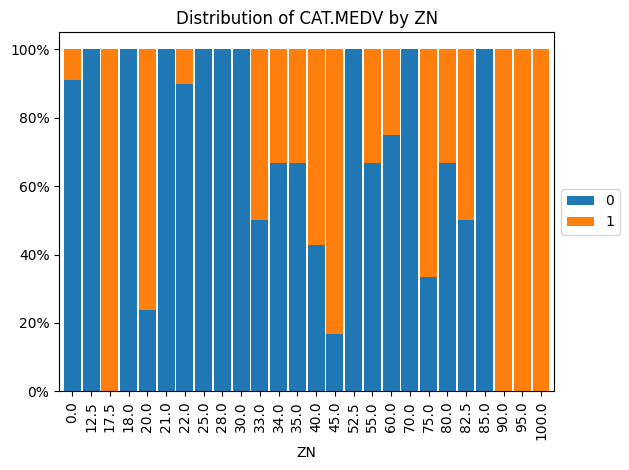

In [19]:
ax = propTbl.transpose().plot(kind='bar', stacked=True, width=0.9)
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
plt.title('Distribution of CAT.MEDV by ZN')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

## Table 4.10
Compute principal components on two dimensions

In [21]:
cereals_df = pd.read_csv('Cereals.csv')
pcs = PCA(n_components=2)
pcs.fit(cereals_df[['calories', 'rating']])

PCA(n_components=2)

The importance of components can be assessed using the explained variance.

In [22]:
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC1', 'PC2']
pcsSummary.round(4)

,PC1,PC2
Standard deviation,22.3165,8.8844
Proportion of variance,0.8632,0.1368
Cumulative proportion,0.8632,1.0000


The `components_` field of `pcs` gives the individual components. The columns in this matrix are the principal components `PC1`, `PC2`. The rows are variables in the order they are found in the input matrix, `calories` and `rating`.

In [23]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=['PC1', 'PC2'], 
                                index=['calories', 'rating'])
pcsComponents_df

,PC1,PC2
calories,-0.847053,0.531508
rating,0.531508,0.847053


Use the `transform` method to get the scores.

In [24]:
scores = pd.DataFrame(pcs.transform(cereals_df[['calories', 'rating']]), 
                      columns=['PC1', 'PC2'])
scores.head()

,PC1,PC2
0,44.921528,2.197183
1,-15.725265,-0.382416
2,40.149935,-5.407212
3,75.310772,12.999126
4,-7.041508,-5.357686


## Table 4.11
Perform a principal component analysis of the whole table ignoring the first three non-numerical columns.

In [25]:
pcs = PCA()
pcs.fit(cereals_df.iloc[:, 3:].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,83.7641,70.9143,22.6437,19.1815,8.4232,2.0917,1.6994,0.7796,0.6578,0.3704,0.1864,0.063,0.0
Proportion of variance,0.5395,0.3867,0.0394,0.0283,0.0055,0.0003,0.0002,0.0000,0.0000,0.0000,0.0000,0.000,0.0
Cumulative proportion,0.5395,0.9262,0.9656,0.9939,0.9993,0.9997,0.9999,1.0000,1.0000,1.0000,1.0000,1.000,1.0


In [26]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns, 
                                index=cereals_df.iloc[:, 3:].columns)
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
calories,-0.077984,-0.009312,0.629206,-0.601021,0.454959
protein,0.000757,0.008801,0.001026,0.003200,0.056176
fat,0.000102,0.002699,0.016196,-0.025262,-0.016098
sodium,-0.980215,0.140896,-0.135902,-0.000968,0.013948
fiber,0.005413,0.030681,-0.018191,0.020472,0.013605
carbo,-0.017246,-0.016783,0.017370,0.025948,0.349267
sugars,-0.002989,-0.000253,0.097705,-0.115481,-0.299066
potass,0.134900,0.986562,0.036782,-0.042176,-0.047151
vitamins,-0.094293,0.016729,0.691978,0.714118,-0.037009
shelf,0.001541,0.004360,0.012489,0.005647,-0.007876


## Table 4.12
We kept the Tableau graphic in the book, however these code snippets demonstrate how a similar graph could be generated using Python

Use the preprocessing functionality in scikit-learn to standardize the data before the PCA

In [27]:
pcs = PCA()
pcs.fit(preprocessing.scale(cereals_df.iloc[:, 3:].dropna(axis=0)))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,1.9192,1.7864,1.3912,1.0166,1.0015,0.8555,0.8251,0.6496,0.5658,0.3051,0.2537,0.1399,0.0
Proportion of variance,0.2795,0.2422,0.1469,0.0784,0.0761,0.0555,0.0517,0.0320,0.0243,0.0071,0.0049,0.0015,0.0
Cumulative proportion,0.2795,0.5217,0.6685,0.7470,0.8231,0.8786,0.9303,0.9623,0.9866,0.9936,0.9985,1.0000,1.0


In [28]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns, 
                                index=cereals_df.iloc[:, 3:].columns)
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
calories,-0.299542,-0.393148,0.114857,-0.204359,0.203899
protein,0.307356,-0.165323,0.277282,-0.300743,0.319749
fat,-0.039915,-0.345724,-0.204890,-0.186833,0.586893
sodium,-0.183397,-0.137221,0.389431,-0.120337,-0.338364
fiber,0.453490,-0.179812,0.069766,-0.039174,-0.255119
carbo,-0.192449,0.149448,0.562452,-0.087835,0.182743
sugars,-0.228068,-0.351434,-0.355405,0.022707,-0.314872
potass,0.401964,-0.300544,0.067620,-0.090878,-0.148360
vitamins,-0.115980,-0.172909,0.387859,0.604111,-0.049287
shelf,0.171263,-0.265050,-0.001531,0.638879,0.329101


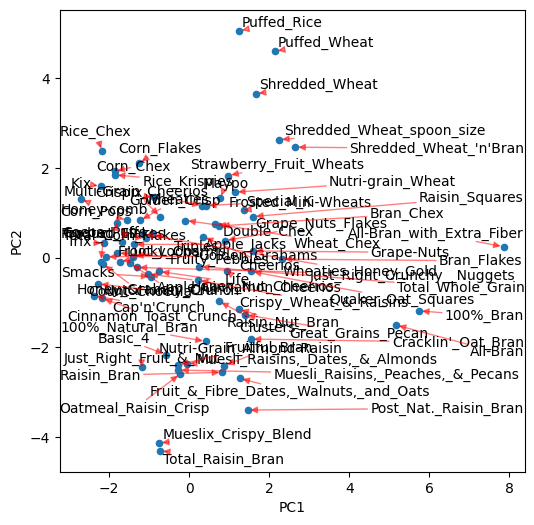

In [30]:
from adjustText import adjust_text
cereals_red_df = cereals_df.dropna(axis=0)
cereals_red_df = cereals_red_df.reset_index(drop=True)

scores = pd.DataFrame(pcs.fit_transform(preprocessing.scale(cereals_red_df.iloc[:, 3:].dropna(axis=0))), 
                      columns=[f'PC{i}' for i in range(1, 14)])
cereals_pca_df = pd.concat([cereals_red_df['name'].dropna(axis=0), scores[['PC1', 'PC2']]], axis=1)
ax = cereals_pca_df.plot.scatter(x='PC1', y='PC2', figsize=(6, 6))
points = cereals_pca_df[['PC1','PC2','name']]

texts = []
for _, (x, y, s) in points.iterrows():
        texts.append(ax.text(x, y, s))
adjust_text(texts, force_text=0.05, arrowprops=dict(arrowstyle="-|>", color='r', alpha=0.5))

plt.show()

c:\Users\Dr_It\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


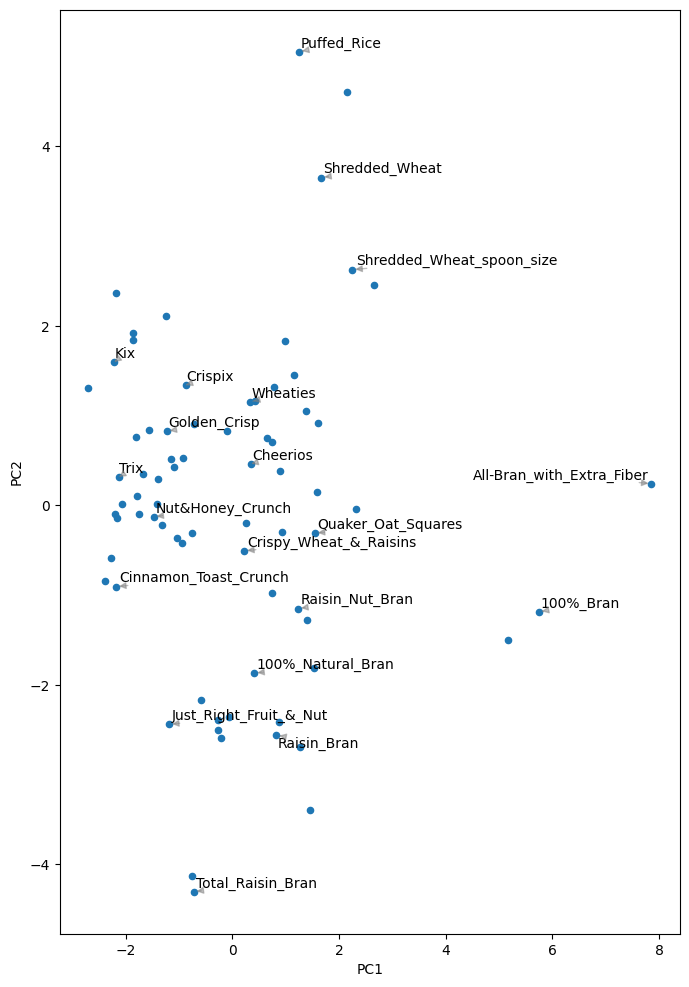

In [31]:
from sklearn.cluster import KMeans

cereals_pca_df = pd.concat([cereals_df['name'], scores], axis=1) #ignore_index=True)
ax = cereals_pca_df.plot.scatter(x='PC1', y='PC2', figsize=(8, 12))
points = pd.DataFrame(points)

def extractPoint(df, texts):
    for _, (x, y, s) in df.sample(1)[['PC1','PC2','name']].iterrows():
        texts.append(ax.text(x, y, s))

kmeans = KMeans(n_clusters=20, random_state=0).fit(points[['PC1', 'PC2']])
points['cluster'] = kmeans.labels_
texts = []
points.groupby(['cluster']).apply(lambda g: extractPoint(g, texts))

adjust_text(texts, force_text=0.05, arrowprops=dict(arrowstyle="-|>", color='grey', alpha=0.5))
plt.show()

## Table 4.13

In [33]:
wine_df = pd.read_csv('Wine.csv')
wine_df = wine_df.drop(columns=['Type'])

In [34]:
pcs = PCA()
pcs.fit(wine_df.dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,314.9632,13.1353,3.0722,2.2341,1.1085,0.9171,0.5282,0.3891,0.3348,0.2678,0.1938,0.1452,0.0906
Proportion of variance,0.9981,0.0017,0.0001,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Cumulative proportion,0.9981,0.9998,0.9999,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [35]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns, 
                                index=wine_df.columns)
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
Alcohol,0.001659,0.001203,-0.016874,-0.141447,0.020337
Malic_Acid,-0.000681,0.002155,-0.122003,-0.160390,-0.612883
Ash,0.000195,0.004594,-0.051987,0.009773,0.020176
Ash_Alcalinity,-0.004671,0.026450,-0.938593,0.330965,0.064352
Magnesium,0.017868,0.999344,0.029780,0.005394,-0.006149
Total_Phenols,0.000990,0.000878,0.040485,0.074585,0.315245
Flavanoids,0.001567,-0.000052,0.085443,0.169087,0.524761
Nonflavanoid_Phenols,-0.000123,-0.001354,-0.013511,-0.010806,-0.029648
Proanthocyanins,0.000601,0.005004,0.024659,0.050121,0.251183
Color_Intensity,0.002327,0.015100,-0.291398,-0.878894,0.331747
